In [3]:
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from transformers import BertTokenizer, TFBertModel
from tensorflow.python import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.layers import GlobalAveragePooling1D, Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from tensorflow import keras
import string
import re
string.punctuation
from keras.models import Sequential
from tensorflow.keras import models, layers, metrics
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
import spacy

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = "/content/drive/My Drive/Capstone/data/depression_pre.csv"
dp = pd.read_csv(path)

path2 = "/content/drive/My Drive/Capstone/data/depression_post.csv"
dp_post = pd.read_csv(path2)

path3 = "/content/drive/My Drive/Capstone/data/anxiety_pre.csv"
anx_pre = pd.read_csv(path3)

path4 = "/content/drive/My Drive/Capstone/data/anxiety_post.csv"
anx_post = pd.read_csv(path4)

path5 = "/content/drive/My Drive/Capstone/data/adhd_pre.csv"
adhd_pre = pd.read_csv(path5)

path6 = "/content/drive/My Drive/Capstone/data/adhd_post.csv"
adhd_post = pd.read_csv(path6)

path7 = "/content/drive/My Drive/Capstone/data/bipolar_pre.csv"
bi_pre = pd.read_csv(path7)

path8 = "/content/drive/My Drive/Capstone/data/bipolar_post.csv"
bi_post = pd.read_csv(path8)

path9 = "/content/drive/My Drive/Capstone/data/ptsd_pre.csv"
pt_pre = pd.read_csv(path9)

path10 = "/content/drive/My Drive/Capstone/data/ptsd_post.csv"
pt_post = pd.read_csv(path10)

path11 = "/content/drive/My Drive/Capstone/data/schiz_pre.csv"
sc_pre = pd.read_csv(path11)

path12 = "/content/drive/My Drive/Capstone/data/schiz_post.csv"
sc_post = pd.read_csv(path12)

path13 = "/content/drive/My Drive/Capstone/data/ed_pre.csv"
ed_pre = pd.read_csv(path13)

path14 = "/content/drive/My Drive/Capstone/data/ed_post.csv"
ed_post = pd.read_csv(path14)

path15 = "/content/drive/My Drive/Capstone/data/bf_pre.csv"
bf_pre = pd.read_csv(path15)

path16 = "/content/drive/My Drive/Capstone/data/bf_post.csv"
bf_post = pd.read_csv(path16)

path17 = "/content/drive/My Drive/Capstone/data/sw_pre.csv"
sw_pre = pd.read_csv(path17)

path18 = "/content/drive/My Drive/Capstone/data/sw_post.csv"
sw_post = pd.read_csv(path18)

In [6]:
dp_pre_txt = dp[["Post Text"]]
dp_post_txt = dp_post[["Post Text"]]
anx_pre_txt = anx_pre[["Post Text"]]
anx_post_txt = anx_post[["Post Text"]]
adhd_pre_txt = adhd_pre[["Post Text"]]
adhd_post_txt = adhd_post[["Post Text"]]
bi_pre_txt = bi_pre[["Post Text"]]
bi_post_txt = bi_post[["Post Text"]]
pt_pre_txt = pt_pre[["Post Text"]]
pt_post_txt = pt_post[["Post Text"]]
sc_pre_txt = sc_pre[["Post Text"]]
sc_post_txt = sc_post[["Post Text"]]
ed_pre_txt = ed_pre[["Post Text"]]
ed_post_txt = ed_post[["Post Text"]]
bf_pre_txt = bf_pre[["Post Text"]]
bf_post_txt = bf_post[["Post Text"]]
sw_pre_txt = sw_pre[["Post Text"]]
sw_post_txt = sw_post[["Post Text"]]

In [7]:
pre_txt = pd.concat([dp_pre_txt, anx_pre_txt, adhd_pre_txt, bi_pre_txt, pt_pre_txt, sc_pre_txt, ed_pre_txt, bf_pre_txt, sw_pre_txt])
post_txt = pd.concat([dp_post_txt, anx_post_txt, adhd_post_txt, bi_post_txt, pt_post_txt, sc_post_txt, ed_post_txt, bf_post_txt, sw_post_txt])

In [8]:
pre_txt['Post Text'].fillna('', inplace=True)
pre_txt.dropna(subset=['Post Text'], inplace=True)
post_txt['Post Text'].fillna('', inplace=True)
post_txt.dropna(subset=['Post Text'], inplace=True)

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

pre_txt['Post Text'] = pre_txt['Post Text'].apply(remove_punctuations)
post_txt['Post Text'] = post_txt['Post Text'].apply(remove_punctuations)

pre_txt['Post Text'] = pre_txt['Post Text'].replace('\n','', regex=True)
post_txt['Post Text'] = post_txt['Post Text'].replace('\n','', regex=True)

pre_txt['Post Text'] = pre_txt['Post Text'].str.lower()
post_txt['Post Text'] = post_txt['Post Text'].str.lower()

In [20]:
pre_txt['covid'] = 'pre'
post_txt['covid'] = 'post'

df = pd.concat([pre_txt, post_txt])

In [21]:
df_pre = df[df['covid']=='pre']
df_post = df[df['covid']=='post']

df_post_downsample = df_post.sample(df_pre.shape[0])
df_post_downsample.shape

df_balanced = pd.concat([df_pre, df_post_downsample])
df_balanced.shape

df_balanced['label'] = df_balanced.covid.map({'pre':0, 'post':1})

In [31]:
df_balanced = df_balanced.rename(columns={"Post Text": "text"})

In [32]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced['text'], df_balanced['label'], test_size=0.2, random_state=42)

In [109]:
import gensim.downloader as api

In [110]:
word_vectors = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Tokenize and encode sequences
def text_to_tensor(text):
    tokens = [word_vectors[word] if word in word_vectors else np.zeros(100) for word in text.split()]
    return torch.tensor(tokens, dtype=torch.float32)

# Pad sequences
def pad_sequence(sequence, max_length):
    if len(sequence) < max_length:
        padding = torch.zeros((max_length - len(sequence), 100), dtype=torch.float32)
        sequence = torch.cat((sequence, padding), dim=0)
    return sequence

max_length = max(max(len(text.split()) for text in X_train), max(len(text.split()) for text in X_test))
X_train_tensor = torch.stack([pad_sequence(text_to_tensor(text), max_length) for text in X_train])
X_test_tensor = torch.stack([pad_sequence(text_to_tensor(text), max_length) for text in X_test])

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [ ]:
# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create train and test datasets
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [101]:
# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [102]:
# Create train and test datasets
train_dataset = CustomDataset(X_train_tensor, y_train)
test_dataset = CustomDataset(X_test_tensor, y_test)

# Define the model
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(TextClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# Define hyperparameters
input_size = 100  # Input size (should match the size of each word vector)
hidden_size = 64  # Size of the hidden layer
num_layers = 2  # Number of LSTM layers
output_size = 2   # Number of output classes

# Instantiate the model
model = TextClassifier(input_size, hidden_size, num_layers, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 10
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print progress
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

In [ ]:
# Evaluation
test_outputs = model(X_test_tensor)
_, predicted = torch.max(test_outputs, 1)
accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f'Accuracy: {accuracy:.2f}')

In [103]:
# Define hyperparameters
input_size = X_train_tensor.shape[1]  # Input size
hidden_size1 = 64  # Size of the first hidden layer
hidden_size2 = 32  # Size of the second hidden layer
output_size = 2   # Number of output classes

# Instantiate the model
model = TextClassifier(input_size, hidden_size1, hidden_size2, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [106]:
# Training loop
num_epochs = 15
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print progress
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/15], Loss: 0.4724
Epoch [2/15], Loss: 0.4282
Epoch [3/15], Loss: 0.4395
Epoch [4/15], Loss: 0.3417
Epoch [5/15], Loss: 0.4014
Epoch [6/15], Loss: 0.5368
Epoch [7/15], Loss: 0.4183
Epoch [8/15], Loss: 0.3283
Epoch [9/15], Loss: 0.3379
Epoch [10/15], Loss: 0.4170
Epoch [11/15], Loss: 0.3555
Epoch [12/15], Loss: 0.4896
Epoch [13/15], Loss: 0.4087
Epoch [14/15], Loss: 0.4723
Epoch [15/15], Loss: 0.4859


In [105]:
test_outputs = model(X_test_tensor)
_, predicted = torch.max(test_outputs, 1)
accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.59


--- trial 1

In [34]:
# Define the dataset class --- trial 1
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [35]:
# Create train and test datasets
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)

In [84]:
# Define the model
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.dp = nn.Dropout(p=0.2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.dp2 = nn.Dropout(p=0.2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.dp(out)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.dp2(out)
        out = self.softmax(out)
        return out

In [85]:
# Define hyperparameters
input_size = X_train_tensor.shape[1]  # Input size
hidden_size = 50  # Size of the hidden layer
output_size = 2   # Number of output classes

# Instantiate the model
model = TextClassifier(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [86]:
train_accuracy_history = []
test_accuracy_history = []

In [89]:
num_epochs = 5
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)


for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print progress
    if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/5], Loss: 0.4902
Epoch [2/5], Loss: 0.4530
Epoch [3/5], Loss: 0.5063
Epoch [4/5], Loss: 0.4467
Epoch [5/5], Loss: 0.4826


In [90]:
test_outputs = model(X_test_tensor)
_, predicted = torch.max(test_outputs, 1)
accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


Epoch [16/16], Loss: 0.3440, Train Accuracy: 0.8867, Test Accuracy: 0.5788


ValueError: x and y must have same first dimension, but have shapes (16,) and (0,)

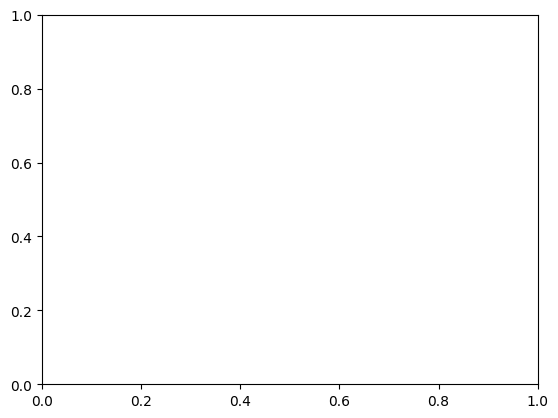

In [61]:
if (epoch+1) % 1 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

    # Plot train and test accuracy
plt.plot(range(1, epoch+2), train_accuracy_history, label='Train Accuracy')
plt.plot(range(1, epoch+2), test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracy')
plt.legend()
plt.show()

In [30]:
nltk_st = stopwords.words('english')
sp = spacy.load("en_core_web_sm")

def clean(txt:str)->str:
    # remove stop words
    txt = [word for word in word_tokenize(txt) if not word.lower() in nltk_st]
    txt = " ".join(txt)
    # lemmitizing
    lemmatized = [word.lemma_ for word in sp(txt)]
    txt = " ".join(lemmatized)
    return txt

In [ ]:
df_balanced["cleaned_text"] = df_balanced['Post Text'].apply(lambda x: clean(x))

In [28]:
texts = df_balanced['Post Text'].tolist()
texts_encodings = tokenizer(texts, truncation=True, padding=True)

In [13]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
def preprocess_string(s):
    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)
    # Replace all runs of whitespaces with no space
    s = re.sub(r"\s+", '', s)
    # replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

In [15]:
def tokenize(x_train,y_train,x_val,y_val):
    word_list = []


    stop_words = set(stopwords.words('english'))
    for sent in x_train:
        for word in sent.lower().split():
            word = preprocess_string(word)
            if word not in stop_words and word != '':
                word_list.append(word)

    corpus = Counter(word_list)
    # sorting on the basis of most common words
    corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:1000]
    # creating a dict
    onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}

    # tokenize
    final_list_train,final_list_test = [],[]
    for sent in x_train:
            final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                     if preprocess_string(word) in onehot_dict.keys()])
    for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])

    encoded_train = [1 if label =='positive' else 0 for label in y_train]
    encoded_test = [1 if label =='positive' else 0 for label in y_val]
    return np.array(final_list_train), np.array(encoded_train),np.array(final_list_test), np.array(encoded_test),onehot_dict

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

ValueError: With n_samples=0, test_size=0.25 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [16]:
x_train,y_train,x_test,y_test,vocab = tokenize(x_train,y_train,x_test,y_test)

NameError: name 'x_train' is not defined